<a href="https://colab.research.google.com/github/Nattaya24/SignLanguagerecognition/blob/main/development_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# American Sign Language Recognition
### Deep Learning Model
+++++++++++++++++++++++++++++++++++++
### Objective
To classify image of american sign language recognition using deep learnnig model

+++++++++++++++++++++++++++++++++++++
### Deep Learning Process
- Loading data
- Exploring data (EDA)
- Image preprocessing
- Model building and tuning
- Model evaluating
- Performance evaluating on test set
- Prediction analysis

+++++++++++++++++++++++++++++++++++++

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#Connect data in Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
!ls /gdrive/MyDrive/archive

american_sign_language.PNG  modelcheckpoints	 sign_mnist_train
amer_sign2.png		    sign_mnist_test	 sign_mnist_train.csv
amer_sign3.png		    sign_mnist_test.csv


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils.multiclass import unique_labels

from sklearn.metrics import classification_report
import string
asl_char = list(set(list(string.ascii_lowercase))-set(["j","z"]))
asl_char.sort()

## Loading data

In [ ]:
BASE_PATH = "/gdrive/MyDrive/archive/"
train = pd.read_csv(BASE_PATH+'sign_mnist_train.csv')
test = pd.read_csv(BASE_PATH+'sign_mnist_test.csv')

## Exploring data

In [ ]:
print(f"Training size:", train.shape)
print(f"Testing size:", test.shape)

Training size: (27455, 785)
Testing size: (7172, 785)


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
fig = px.histogram(train,
                   x='label',
                   color = 'label',
                   title="Distrubition of Labels in the Training Set",
                   width=700, height=500)
fig.show()

In [ ]:
#creating bar graph that shows the distrubition of labels within the test set
fig = px.histogram(test,
                   x='label',
                   color = 'label',
                   title="Distrubition of Labels in the Test Set",
                   width=700, height=500)
fig.show()

## Data Pre-processing

In [ ]:
#creating Y_train
Y_train = train["label"]

#creating X_train
X_train = train.drop(labels = ["label"],axis = 1)

In [ ]:
#creating y_test
y_test = test["label"]

#creating x_test
x_test = test.drop(labels = ["label"],axis = 1)

## Splitting data

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


In [ ]:
# Reshape and normalize the data
X_train = X_train.values.reshape(-1,28,28,1)/255
x_test = x_test.values.reshape(-1,28,28,1)/255
X_val = X_val.values.reshape(-1,28,28,1)/255

## Model Building

In [ ]:
# Define the CNN model
model = keras.Sequential([

    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.25),


    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.25),
  #Flatten matrix
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Train the model
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=BASE_PATH+"modelcheckpoints/best_model.h5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
# Train the model
training_result = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    shuffle=True,# shuffle every epoch
    callbacks=[model_checkpoint_callback]
    )


Epoch 1/50
687/687 [==============================] - 15s 7ms/step - loss: 1.6334 - accuracy: 0.5059 - val_loss: 0.4519 - val_accuracy: 0.8769
Epoch 2/50
687/687 [==============================] - 5s 7ms/step - loss: 0.3540 - accuracy: 0.8863 - val_loss: 0.1492 - val_accuracy: 0.9621
Epoch 3/50
687/687 [==============================] - 4s 5ms/step - loss: 0.1555 - accuracy: 0.9505 - val_loss: 0.0482 - val_accuracy: 0.9922
Epoch 4/50
687/687 [==============================] - 4s 6ms/step - loss: 0.0877 - accuracy: 0.9736 - val_loss: 0.0269 - val_accuracy: 0.9978
Epoch 5/50
687/687 [==============================] - 4s 5ms/step - loss: 0.0531 - accuracy: 0.9840 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 6/50
687/687 [==============================] - 5s 7ms/step - loss: 0.0374 - accuracy: 0.9892 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 7/50
687/687 [==============================] - 4s 5ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.0055 - val_accuracy: 0.9989
Epoch

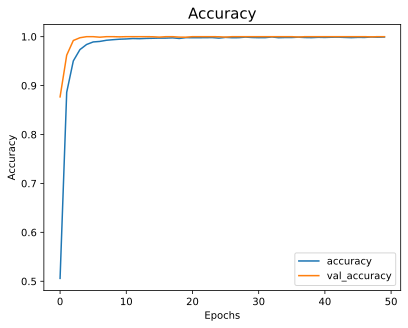

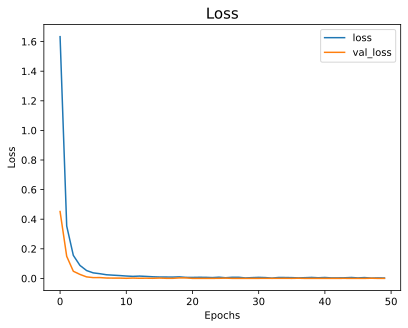

In [ ]:
# Accuracy
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.DataFrame(training_result.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Training loss
pd.DataFrame(training_result.history)[['loss','val_loss']].plot()
plt.title("Loss", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
history_frame = pd.DataFrame(training_result.history)
history_frame


,loss,accuracy,val_loss,val_accuracy
0,1.633415,0.505873,0.451887,0.876889
1,0.353960,0.886268,0.149168,0.962120
2,0.155481,0.950464,0.048220,0.992169
3,0.087667,0.973593,0.026929,0.997815
4,0.053057,0.983974,0.010142,1.000000
5,0.037365,0.989210,0.005290,1.000000
6,0.031657,0.990257,0.005533,0.998907
7,0.024645,0.992624,0.002539,1.000000
8,0.021740,0.993808,0.001973,1.000000
9,0.019171,0.994810,0.001916,0.999636


## Performance Evaluation on Test Set

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

225/225 [==============================] - 1s 3ms/step - loss: 0.4173 - accuracy: 0.9484
Test loss: 0.4172731935977936
Test accuracy: 0.9484105110168457


In [ ]:
## Make predictions on the test data
predictions = (model.predict(x_test))
y_pred = np.argmax(model.predict(x_test),axis=1)
#predicted_classes = np.argmax(predictions, axis=0)


#creating a report that show how our predictions compare with actual values
print(classification_report(y_test, y_pred, target_names=asl_char))

225/225 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           a       0.95      1.00      0.97       331
           b       1.00      0.95      0.98       432
           c       1.00      1.00      1.00       310
           d       1.00      1.00      1.00       245
           e       0.95      1.00      0.97       498
           f       0.98      1.00      0.99       247
           g       0.94      0.91      0.93       348
           h       0.99      0.95      0.97       436
           i       1.00      1.00      1.00       288
           k       0.85      0.98      0.91       331
           l       0.88      1.00      0.94       209
           m       0.91      0.89      0.90       394
           n       1.00      0.67      0.80       291
           o       1.00      0.98      0.99       246
           p       0.96      1.00      0.98       347
           q       0.99      1.00      1.00       164
           r       0.94   

Text(95.72222222222221, 0.5, 'True Label')

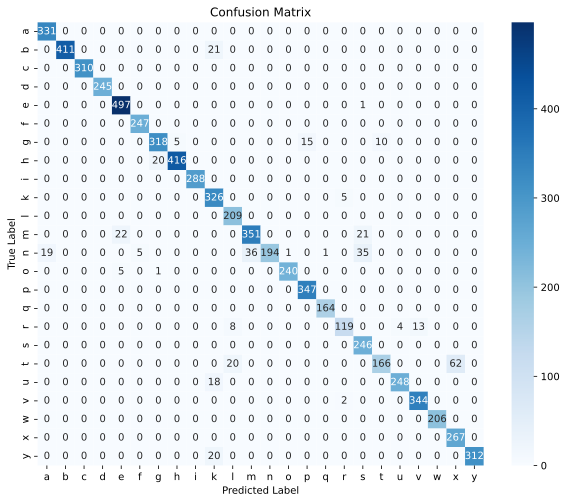

In [ ]:
# Create a confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
confusion_mtx = pd.DataFrame(confusion_mtx)
confusion_mtx.index = asl_char
confusion_mtx.columns = asl_char
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot = True, cmap=plt.cm.Blues, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


In [ ]:
# Show predicted classes for some samples of test data
predicted_classes = np.argmax(predictions, axis=0)

for i in range(10):
    print('Predicted class:', asl_char[y_pred[i]])
    print('True class:',asl_char[y_test[i]])
    print('---')


Predicted class: g
True class: g
---
Predicted class: f
True class: f
---
Predicted class: l
True class: l
---
Predicted class: a
True class: a
---
Predicted class: d
True class: d
---
Predicted class: w
True class: w
---
Predicted class: l
True class: l
---
Predicted class: p
True class: p
---
Predicted class: d
True class: d
---
Predicted class: h
True class: h
---


<ipython-input-25-e546ade15d18>:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



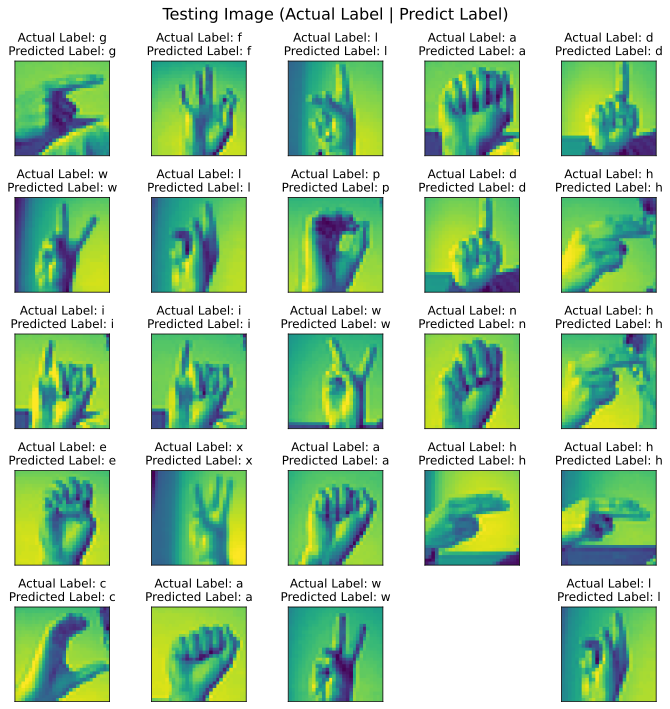

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle('Testing Image (Actual Label | Predict Label)', fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual Label: {asl_char[y_test[i]]}\nPredicted Label: {asl_char[y_pred[i]]}")
    plt.tight_layout()
plt.show()